# Titanic data visualization

[Titanic](https://www.kaggle.com/c/titanic) のデータを可視化して、欠損値の処理や各種相関を見出す練習

## Import libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

元のトレーニングデータを読み込む。

In [2]:
train_df = pd.read_csv ('train.csv')
test_df = pd.read_csv ('test.csv')

## 生データを見てみよう

In [3]:
train_df.head ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 気づくこと
    * Sex は male/female の 2 種類
        * あとでダミー変数に置き換えよう
    * Ticket はチケット番号で、数字だけでなくアルファベットも含まれている
    * Cabin は欠損あり
    * Embarked は S, Q, C の 3 種類
        * あとでダミー変数に置き換えよう
    * Jupyter Notebook の表の出力が素敵すぎる

In [4]:
train_df.count ()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
test_df.count ()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

Age と Cabin が欠損している。<br>
テストデータの方は Fare も 1 つだけ欠損している。<br>

In [6]:
train_df.describe ()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 約 38% が生存
* 75% は 38 歳以下。わずかに高齢者がいて、最高齢は 80 歳
* 75% は親・子供がいない
* $512 という高額なチケットがわずかにあるらしい

In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McMahon, Mr. Martin",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


* 577 / 891 = 65% が男性
* 同じ番号のチケットも存在。そのうち CA.2343 は 7 名が使用
* 644 / 889 = 72% が S から乗船

## 各種データの可視化

### 'Sex' and 'Survived' and 'Pclass'

* 女性のほうが生き残る確率は高い。
* 上流階級のほうが生き残る確率は高い。

これらを可視化する。

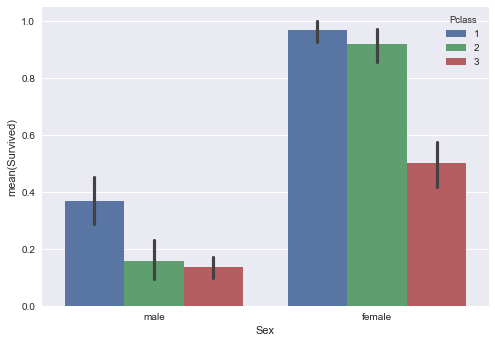

In [8]:
sns.barplot (x='Sex', y='Survived', hue='Pclass', data=train_df)

In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


* 気づくこと
    * 女性の方が生き残りやすい
    * 上流階級のほうが生き残りやすい

そのままでした。

### 'SibSp' and 'Survived'

兄弟・夫婦がともに乗船しているという事実は、生存率と相関があるのか？

In [11]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


なんともいえない

### 'Parch' and 'Survived'
親・子供がともに乗船しているという事実は、生存率と相関があるのか？

In [12]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


なんともいえない

### 'Age' and 'Survived'

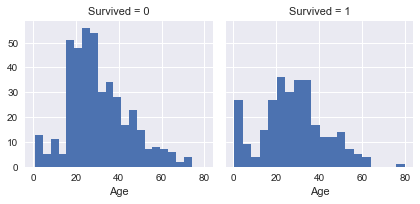

In [13]:
g = sns.FacetGrid(data=train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

4 歳以下は Survived = 1 の比率が高い。<br>
あと 80 歳の人は一人だけだが生存している。

Age は重要なファクターと思われるが、欠損しているデータがあるので、なんとかして保管する必要がありそうだ。

### 'Embarked' and 'Survived' and 'Fare'

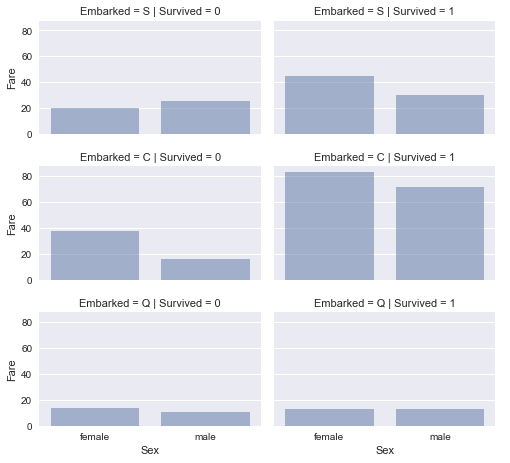

In [14]:
grid = sns.FacetGrid (data=train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map (sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend ()

* 高い金を払ったら、やはり生存率も上がる
* 乗船した場所も生存率に関係していそう。C > S > Q のように見える。

### 'Age' and 'Fare'
テストデータでは Fare が欠損している行がある。<br>
それをどのように補完すべきか。<br>
Age と Fare に相関があるかを確認してみる。

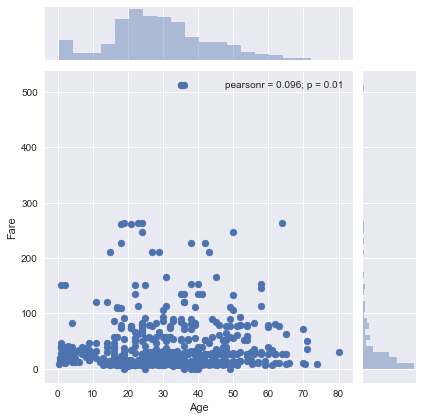

In [15]:
sns.jointplot (x='Age', y='Fare', data=train_df)

### 'Pclass' and 'Fare'
これは相関あるでしょう。

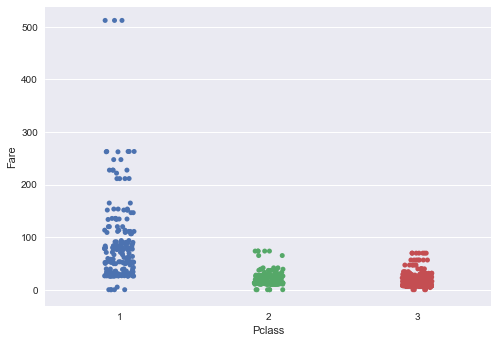

In [16]:
sns.stripplot (x='Pclass', y='Fare', data=train_df, jitter=True)

欠損している Fare は、所属する Pclass で補完すれば良さそう。